<a href="https://colab.research.google.com/github/leehyunggeunkeun/inha/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D1(%EC%9D%98%EB%A3%8C%EA%B8%B0%EA%B4%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드하고 데이터형태 파악

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#한글설정

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [18]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/데이터분석/연관관계분석/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv',low_memory=False)
df.shape

(91335, 39)

In [19]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,일반 의원,41.0,경기도,41273.0,안산시 단원구,4127360000,선부3동,4.127311e+09,선부동,4127310900210810000,1,대지,1081,NaN,경기도 안산시 단원구 선부동 1081,412733191011,경기도 안산시 단원구 달미로,10,NaN,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,일반 의원,11.0,서울특별시,11680.0,강남구,1168065600,도곡2동,1.168012e+09,도곡동,1168011800204670014,1,대지,467,14.0,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,NaN,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,일반 의원,41.0,경기도,41390.0,시흥시,4139059100,정왕1동,4.139013e+09,정왕동,4139013200217400001,1,대지,1740,1.0,경기도 시흥시 정왕동 1740-1,413903199049,경기도 시흥시 중심상가로,178,NaN,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,NaN,26.0,부산광역시,26500.0,수영구,2650078000,광안3동,2.650010e+09,광안동,2650010400200740001,1,대지,74,1.0,부산광역시 수영구 광안동 74-1,265003131037,부산광역시 수영구 수영로,688,NaN,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,의약품 및 의료용품 소매업,41.0,경기도,41465.0,용인시 수지구,4146551000,풍덕천1동,4.146510e+09,풍덕천동,4146510100207120002,1,대지,712,2.0,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,NaN,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [20]:
df.info() #결측치로 데이의 개수 차이가 난다, object는 문자형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [21]:
df.describe()

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,경도,위도
count,9.133500e+04,90956.000000,90956.000000,9.133500e+04,9.128000e+04,9.133500e+04,91335.000000,91335.000000,72079.000000,9.133500e+04,91335.000000,10604.000000,91323.000000,91333.00000,91335.000000,91335.000000
mean,2.121818e+07,32.586712,32898.381877,3.293232e+09,3.293385e+09,3.293191e+18,1.001336,587.534549,17.005092,3.293207e+11,251.200482,7.241135,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,13.045138,12985.393171,1.297387e+09,1.297706e+09,1.297393e+18,0.036524,582.519364,53.451413,1.297391e+11,477.456487,12.426816,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,11.000000,11110.000000,1.111052e+09,1.111010e+09,1.111010e+18,1.000000,1.000000,1.000000,1.111020e+11,0.000000,1.000000,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,26.000000,26350.000000,2.635065e+09,2.635011e+09,2.635011e+18,1.000000,162.000000,2.000000,2.635042e+11,29.000000,1.000000,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,41.000000,41117.000000,4.111758e+09,4.111710e+09,4.111711e+18,1.000000,462.000000,5.000000,4.111743e+11,92.000000,2.000000,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,43.000000,43113.000000,4.311370e+09,4.311311e+09,4.311311e+18,1.000000,858.000000,14.000000,4.311332e+11,257.000000,9.000000,602811.000000,46044.00000,128.108919,37.507463
max,2.852470e+07,50.000000,50130.000000,5.013061e+09,5.013032e+09,5.013061e+18,2.000000,7338.000000,1428.000000,5.013049e+11,8795.000000,244.000000,799801.000000,63643.00000,130.909912,38.499659


# 결측치 다루기 

## 결측치가 많은 column 삭제하기, 혹은 필요하지 않은 column 삭제하기

In [22]:
df.isnull() #True가 NaN값

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False
3,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,True,True,False,False
91331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False
91332,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
91333,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,True,False,False


In [23]:
df.isnull().sum()  #결측치가 몇개인지 나온다 

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backen

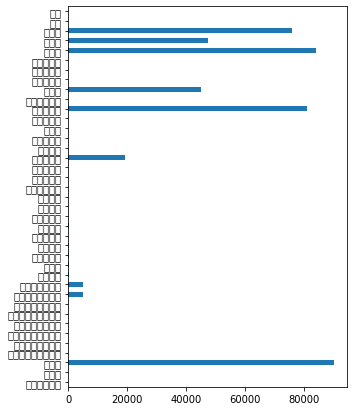

In [24]:
#결측치의 개수 그래프화하기

null_count=df.isnull().sum()
null_count.plot.barh(figsize=(5,7))

In [25]:
#.reset_index 사용하면 데이터 프레임 형태로 변환

df_null_count=null_count.reset_index()
df_null_count

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,4922


In [26]:
df_null_count.columns=['컬럼명','결측치수']
df_null_count

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,4922


In [27]:
df_null_count_top=df_null_count.sort_values('결측치수',ascending=False).head(10)
df_null_count_top

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [28]:
df['지점명']  #Nan은 not a number의 약자로 결측치를 의미함

0         NaN
1         NaN
2         NaN
3         NaN
4         수지점
         ... 
91330     베스트
91331    봄산후조
91332     NaN
91333     NaN
91334     NaN
Name: 지점명, Length: 91335, dtype: object

In [29]:
drop_columns=df_null_count_top['컬럼명'].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [30]:
df[drop_columns]

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0
...,...,...,...,...,...,...,...,...,...,...
91330,베스트,NaN,NaN,NaN,NaN,NaN,NaN,G47811,의약품 및 의료용품 소매업,30.0
91331,봄산후조,NaN,NaN,NaN,NaN,청한프라자,NaN,S96993,개인 간병인 및 유사 서비스업,41.0
91332,NaN,NaN,NaN,NaN,2,한신시티빌,1.0,Q86102,일반 병원,26.0
91333,NaN,NaN,NaN,NaN,NaN,NaN,9.0,Q86203,한의원,11.0


In [31]:
print(df.shape)
df.drop(drop_columns,axis=1,inplace=True)
df.shape

(91335, 39)


(91335, 29)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

# 중복되는 자료 확인

In [33]:
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [34]:
df['시도명']

0          경기도
1        서울특별시
2          경기도
3        부산광역시
4          경기도
         ...  
91330    대전광역시
91331      경기도
91332    부산광역시
91333    서울특별시
91334     충청남도
Name: 시도명, Length: 91335, dtype: object

In [35]:
df['시도명'].value_counts()

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [36]:
df['시도명'].value_counts(normalize=True) #각 columns별 비율을 알 수 있음

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

In [37]:
city_normalize=df['시도명'].value_counts(normalize=True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_

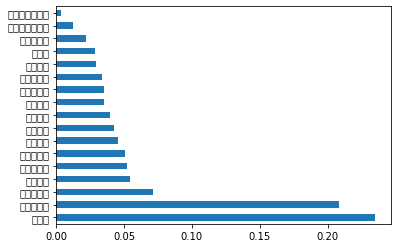

In [38]:
city_normalize.plot.barh()

# 데이터 색인하기(원하는 데이터만 모아서 따로본다)

In [39]:
df_medical=df[df['상권업종중분류명']=='약국/한약방'].copy()
df_medical.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,용인시 수지구,4146551000,풍덕천1동,4.146510e+09,풍덕천동,4146510100207120002,1,대지,712,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,강원도,42110.0,춘천시,4211054500,약사명동,4.211010e+09,중앙로2가,4211010500200990000,1,대지,99,강원도 춘천시 중앙로2가 99,421104454113,강원도 춘천시 낙원길,50,4211010500101000000023668,강원도 춘천시 낙원길 50,200042.0,24273.0,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,충청북도,43111.0,청주시 상당구,4311168000,금천동,4.311112e+09,금천동,4311112000201870017,1,대지,187,충청북도 청주시 상당구 금천동 187-17,431114508623,충청북도 청주시 상당구 중고개로337번길,134,4311112000101870017042942,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,127.499206,36.625355
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,경상남도,48890.0,합천군,4889046000,용주면,4.889046e+09,용주면,4889046030200780002,2,산,78,경상남도 합천군 용주면 월평리 78-2,488904844473,경상남도 합천군 용주면 월평길,149,4889046030200780002048274,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
13,21217689,제중당한약방,S,의료,S02,약국/한약방,S02A02,한약방,전라남도,46830.0,영암군,4683035000,도포면,4.683035e+09,도포면,4683035023202960000,1,대지,296,전라남도 영암군 도포면 덕화리 296,468304685396,전라남도 영암군 도포면 인덕길,75,4683035023102960000000001,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,126.630348,34.834080


## 여려조건으로 색인하기

In [40]:
df_seoul_drug=df[(df['상권업종소분류명']=='약국') & (df['시도명']=='서울특별시')]  #pandas에서는 &가 and임
df_seoul_drug

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,강남구,1168064000,역삼1동,1.168010e+09,역삼동,1168010100208210000,1,대지,821,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11740.0,강동구,1174070000,둔촌2동,1.174011e+09,둔촌동,1174010600206300000,1,대지,630,서울특별시 강동구 둔촌동 630,117403124002,서울특별시 강동구 명일로,172,1174010600106090000000001,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135
130,21589838,신세계약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11260.0,중랑구,1126069000,신내2동,1.126011e+09,신내동,1126010600206460000,1,대지,646,서울특별시 중랑구 신내동 646,112603106007,서울특별시 중랑구 신내로,211,1126010600106460000000300,서울특별시 중랑구 신내로 211,131130.0,2024.0,127.092597,37.616424
136,22388303,메디팜한솔약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11200.0,성동구,1120057000,행당2동,1.120011e+09,행당동,1120010700203460000,1,대지,346,서울특별시 성동구 행당동 346,112003103006,서울특별시 성동구 행당로,82,1120010700103460012016935,서울특별시 성동구 행당로 82,133777.0,4717.0,127.027513,37.556238
141,22412563,명약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11230.0,동대문구,1123073000,휘경2동,1.123011e+09,휘경동,1123010900202860121,1,대지,286,서울특별시 동대문구 휘경동 286-121,112304115120,서울특별시 동대문구 망우로18나길,3,1123010900102860121007257,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,127.060556,37.587349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91239,16131547,우리이웃약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11290.0,성북구,1129070500,종암동,1.129014e+09,종암동,1129013500200340003,1,대지,34,서울특별시 성북구 종암동 34-3,112904121682,서울특별시 성북구 종암로5길,26,1129013500100340003022753,서울특별시 성북구 종암로5길 26,136769.0,2811.0,127.033908,37.594792
91275,16195709,더블유스토어,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11530.0,구로구,1153056000,구로5동,1.153010e+09,구로동,1153010200205010000,1,대지,501,서울특별시 구로구 구로동 501,115303116005,서울특별시 구로구 구로중앙로,134,1153010200105010000000001,서울특별시 구로구 구로중앙로 134,152731.0,8293.0,126.884285,37.499936
91288,16131839,종각팜약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11110.0,종로구,1111061500,종로1.2.3.4가동,1.111014e+09,종로2가,1111013800200840008,1,대지,84,서울특별시 종로구 종로2가 84-8,111103100013,서울특별시 종로구 종로,68,1111013800100160006014311,서울특별시 종로구 종로 68,110122.0,3189.0,126.984930,37.569882
91301,16188650,온누리약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11530.0,구로구,1153054000,구로3동,1.153010e+09,구로동,1153010200207980030,1,대지,798,서울특별시 구로구 구로동 798-30,115304148329,서울특별시 구로구 디지털로27길,116,1153010200107980032000001,서울특별시 구로구 디지털로27길 116,152875.0,8374.0,126.888070,37.484897


In [41]:
df_seoul_drug.shape

(3579, 29)

In [42]:
df_seoul_hospital=df[(df['상권업종소분류명']=='종합병원') & (df['시도명']=='서울특별시')].copy()
df_seoul_hospital

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,광진구,1121577000,중곡4동,1.121510e+09,중곡동,1121510100200580025,1,대지,58,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048
353,20471487,홍익병원별관,S,의료,S01,병원,S01B01,종합병원,서울특별시,11470.0,양천구,1147065000,신정4동,1.147010e+09,신정동,1147010100208970013,1,대지,897,서울특별시 양천구 신정동 897-13,114702005008,서울특별시 양천구 국회대로,250,1147010100108970013001044,서울특별시 양천구 국회대로 250,158070.0,7937.0,126.862805,37.529213
385,20737057,SNUH,S,의료,S01,병원,S01B01,종합병원,서울특별시,11680.0,강남구,1168064000,역삼1동,1.168010e+09,역삼동,1168010100207360055,1,대지,736,서울특별시 강남구 역삼동 736-55,116804166727,서울특별시 강남구 테헤란로26길,10,1168010100107360055027688,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,영등포구,1156054000,여의동,1.156011e+09,여의도동,1156011000200620000,1,대지,62,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296
2461,20024045,한양,S,의료,S01,병원,S01B01,종합병원,서울특별시,11200.0,성동구,1120055000,사근동,1.120011e+09,행당동,1120010700200150001,1,대지,15,서울특별시 성동구 행당동 15-1,112003103002,서울특별시 성동구 마조로,22,1120010700100150001019623,서울특별시 성동구 마조로 22-2,133070.0,4763.0,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,서초구,1165058100,반포4동,1.165011e+09,반포동,1165010700205050000,1,대지,505,서울특별시 서초구 반포동 505,116502121003,서울특별시 서초구 반포대로,222,1165010700101230000017226,서울특별시 서초구 반포대로 222,137701.0,6591.0,127.005841,37.502382
76508,12292992,라마르의원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11740.0,강동구,1174062000,천호3동,1.174011e+09,천호동,1174010900204530008,1,대지,453,서울특별시 강동구 천호동 453-8,117404172367,서울특별시 강동구 천호대로157길,18,1174010900104530021010314,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11140.0,중구,1114055000,명동,1.114013e+09,명동2가,1114012700200010001,1,대지,1,서울특별시 중구 명동2가 1-1,111404103165,서울특별시 중구 명동길,74,1114012700100010001019574,서울특별시 중구 명동길 74,100809.0,4537.0,126.986758,37.563662
90581,16332576,씨엠병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,영등포구,1156053500,영등포동,1.156010e+09,영등포동4가,1156010500200900000,1,대지,90,서울특별시 영등포구 영등포동4가 90,115604154717,서울특별시 영등포구 영등포로36길,13,1156010500100900000035097,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,126.903857,37.518807


In [43]:
df_seoul_hospital.columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명',
       '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소', '도로명코드',
       '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도', '위도'],
      dtype='object')

In [44]:
df_seoul_hospital['시군구명'].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
도봉구      4
양천구      4
서대문구     4
강북구      4
성북구      3
성동구      2
구로구      2
동대문구     2
관악구      2
종로구      2
강서구      2
금천구      2
노원구      2
중랑구      2
은평구      1
동작구      1
용산구      1
마포구      1
Name: 시군구명, dtype: int64

## 특정 지역만 보기

In [45]:
df_seoul=df[df['시도명']=='서울특별시'].copy()
df_seoul

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,서울특별시,11680.0,강남구,1168065600,도곡2동,1.168012e+09,도곡동,1168011800204670014,1,대지,467,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,1168011800104670014000001,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742
8,20808534,코원성형외과,S,의료,S01,병원,S01B08,정형/성형외과,서울특별시,11680.0,강남구,1168054500,압구정동,1.168011e+09,신사동,1168010700205920004,1,대지,592,서울특별시 강남구 신사동 592-4,116803121022,서울특별시 강남구 논현로,826,1168010700105920004010990,서울특별시 강남구 논현로 826,135893.0,6025.0,127.028531,37.522223
9,20755460,헬로스마일소아과,S,의료,S01,병원,S01B11,소아과,서울특별시,11680.0,강남구,1168052100,논현1동,1.168011e+09,논현동,1168010800200390018,1,대지,39,서울특별시 강남구 논현동 39-18,116804166129,서울특별시 강남구 논현로131길,30,1168010800100390018000001,서울특별시 강남구 논현로131길 30,135010.0,6045.0,127.027878,37.514144
31,20872995,고운나라성형외과,S,의료,S01,병원,S01B08,정형/성형외과,서울특별시,11740.0,강동구,1174065000,성내2동,1.174011e+09,성내동,1174010800200090005,1,대지,9,서울특별시 강동구 성내동 9-5,117402000008,서울특별시 강동구 천호대로,1032,1174010800100090005004868,서울특별시 강동구 천호대로 1032,134030.0,5379.0,127.126507,37.537333
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,강남구,1168064000,역삼1동,1.168010e+09,역삼동,1168010100208210000,1,대지,821,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91318,16190911,동민피부과비뇨기과,S,의료,S01,병원,S01B12,비뇨기과,서울특별시,11230.0,동대문구,1123070500,청량리동,1.123011e+09,청량리동,1123010700202350001,1,대지,235,서울특별시 동대문구 청량리동 235-1,112303105006,서울특별시 동대문구 약령시로,147,1123010700102350001013495,서울특별시 동대문구 약령시로 147,130781.0,2489.0,127.045802,37.583788
91319,16108560,씨앤디자인치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,서울특별시,11545.0,금천구,1154551000,가산동,1.154510e+09,가산동,1154510100200600025,1,대지,60,서울특별시 금천구 가산동 60-25,115453116013,서울특별시 금천구 벚꽃로,234,1154510100100600025000001,서울특별시 금천구 벚꽃로 234,153798.0,8513.0,126.886122,37.475986
91320,16131813,월계치과,S,의료,S01,병원,S01B04,치과의원,서울특별시,11350.0,노원구,1135056000,월계1동,1.135010e+09,월계동,1135010200209420000,1,대지,942,서울특별시 노원구 월계동 942,113503107018,서울특별시 노원구 월계로,338,1135010200109420000018688,서울특별시 노원구 월계로 338,139847.0,1885.0,127.057988,37.629326
91322,16091491,설연화한복감성약방,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11260.0,중랑구,1126062000,묵1동,1.126010e+09,묵동,1126010400201740001,1,대지,174,서울특별시 중랑구 묵동 174-1,112603005050,서울특별시 중랑구 공릉로,28,1126010400101740001009985,서울특별시 중랑구 공릉로 28,131848.0,2034.0,127.078082,37.613194


In [46]:
df_seoul_count=df_seoul['시군구명'].value_counts()
df_seoul_count

강남구     3120
서초구     1491
동대문구    1152
송파구     1021
광진구      935
강서구      799
노원구      741
은평구      739
영등포구     731
성북구      708
강동구      703
마포구      649
관악구      578
중구       576
양천구      574
서대문구     543
중랑구      497
종로구      492
동작구      489
성동구      482
구로구      451
도봉구      412
강북구      396
용산구      361
금천구      303
Name: 시군구명, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_

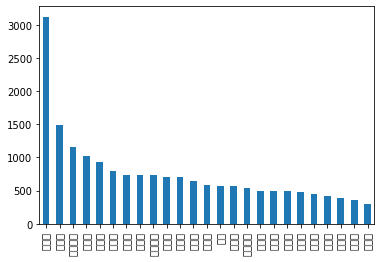

In [47]:
df_seoul_count.plot.bar()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text

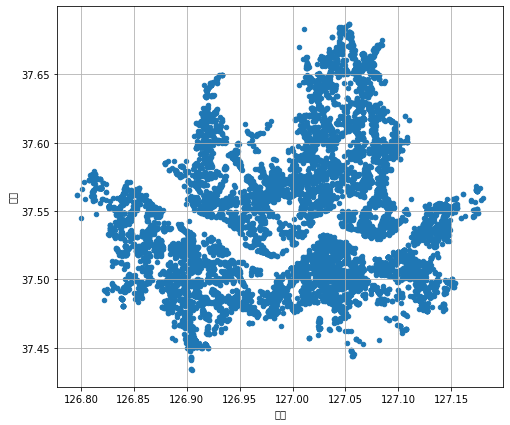

In [48]:
df_seoul[['경도','위도','시군구명']].plot.scatter(x='경도',y='위도',figsize=(8,7),grid=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_

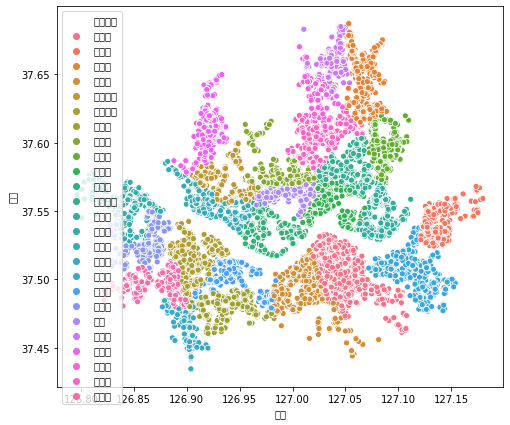

In [49]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='경도',y='위도',hue='시군구명',data=df_seoul)

# Folium 사용하기

In [50]:
import folium

map=folium.Map(location=[37.542447,127.008505])


for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, "상호명"]
    address = df_seoul_hospital.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map

In [51]:
df_seoul_hospital['위도'].mean(), df_seoul_hospital['경도'].mean()

(37.54244715656364, 127.00850537565638)

In [52]:
df_seoul_hospital['상호명']

305                대진의료재단
353                홍익병원별관
385                  SNUH
1917     평화드림여의도성모병원의료기매장
2461                   한양
               ...       
71991        서울성모병원응급의료센터
76508               라마르의원
90492       가톨릭대학교여의도성모병원
90581                씨엠병원
90788              성베드로병원
Name: 상호명, Length: 91, dtype: object